In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
type(label_names[train_labels[1][0]])


NameError: ignored

In [ ]:
train_labels


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

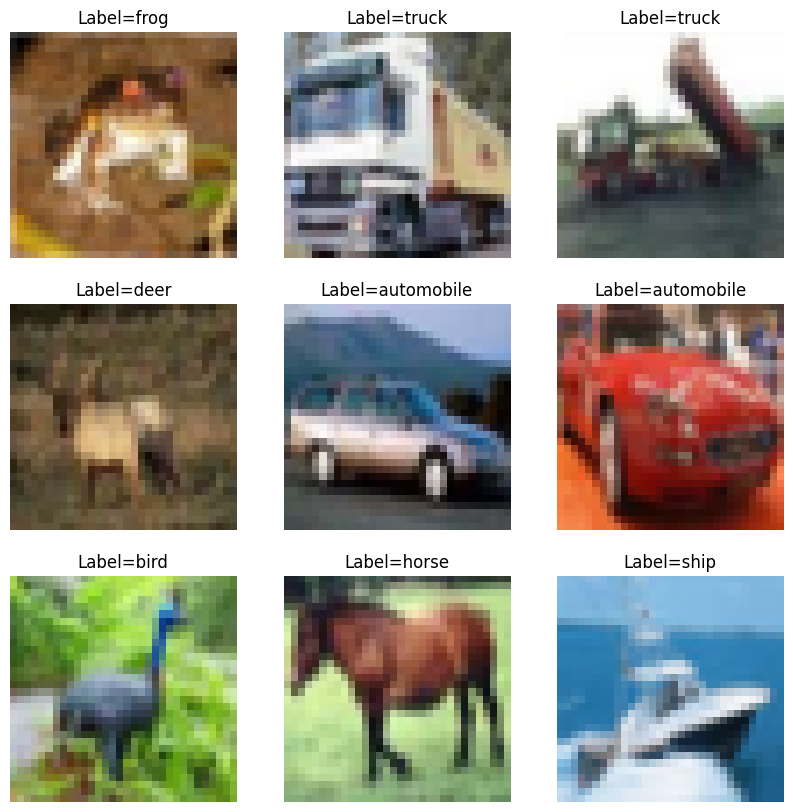

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
      # Display the image
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(train_images[i], cmap='gray')
      # Print the label
      plt.title("Label="+label_names[train_labels[i][0]])
      plt.axis('off')

# Show the subplot
plt.show()

In [ ]:
train_images.shape


(50000, 32, 32, 3)

In [ ]:
test_images.shape


(10000, 32, 32, 3)

In [ ]:
train_images.shape


(50000, 32, 32, 3)

In [ ]:
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
print("train labels before to_categorical ",train_labels)
print("train labels after to_categorical ",to_categorical(train_labels))
print("=========")
print("train before before to_categorical ",test_labels)
print("train labels after to_categorical ",to_categorical(test_labels))

train labels before to_categorical  [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
train labels after to_categorical  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
train before before to_categorical  [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
train labels after to_categorical  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
print(32*32*3*128+128)


393344


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               393344    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 418,762
Trainable params: 418,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_labels


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 5.6607 - accuracy: 0.2051
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2797 - accuracy: 0.2731
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0052 - accuracy: 0.3058
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9156 - accuracy: 0.3284
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8739 - accuracy: 0.3397
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8298 - accuracy: 0.3524
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8070 - accuracy: 0.3581
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7816 - accuracy: 0.3669
Epoch 9/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7473 - accuracy: 0.3789
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

In [ ]:
_,train_accuracy=model.evaluate(train_images
               , train_labels)

1563/1563 [==============================] - 5s 3ms/step - loss: 1.6555 - accuracy: 0.4025


In [ ]:
_,test_accuracy=model.evaluate(test_images
               , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.7060 - accuracy: 0.3839


In [ ]:
print("train_accuracy",train_accuracy)
print("test_accuracy",test_accuracy)

train_accuracy 0.40248000621795654
test_accuracy 0.383899986743927


In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               1573376   
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dense_19 (Dense)            (None, 10)               

In [ ]:
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/8
1563/1563 [==============================] - 63s 39ms/step - loss: 3.1104 - accuracy: 0.2725
Epoch 2/8
1563/1563 [==============================] - 62s 40ms/step - loss: 1.8606 - accuracy: 0.3452
Epoch 3/8
1563/1563 [==============================] - 57s 37ms/step - loss: 1.7415 - accuracy: 0.3790
Epoch 4/8
1563/1563 [==============================] - 64s 41ms/step - loss: 1.6687 - accuracy: 0.4017
Epoch 5/8
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6082 - accuracy: 0.4251
Epoch 6/8
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5482 - accuracy: 0.4469
Epoch 7/8
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5032 - accuracy: 0.4619
Epoch 8/8
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4597 - accuracy: 0.4778


In [ ]:
print("train_accuracy",train_accuracy)
print("test_accuracy",test_accuracy)

train_accuracy 0.40248000621795654
test_accuracy 0.383899986743927


In [ ]:

import tensorflow as tf

model_CNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.34),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
model_CNN.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_CNN.fit(train_images, train_labels, epochs=15)


NameError: ignored

In [ ]:
_,train_accuracy=model_CNN.evaluate(train_images
               , train_labels)

_,test_accuracy2=model_CNN.evaluate(test_images
               , test_labels)

In [ ]:
print("train_accuracy",train_accuracy)
print("test_accuracy",test_accuracy2)

In [ ]:
test_labels[0]


In [ ]:
# Predict the label for 9 images
test_images_9 = test_images[:9]
test_labels_9 = test_labels[:9]
# Create a subplot
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(9):
  test_images_9_1 = np.reshape(test_images_9[i], (1, 32, 32,3))
  prediction = model_CNN.predict(test_images_9_1)
  axes[i // 3, i % 3] = plt.subplot(3, 3, i + 1)
  axes[i // 3, i % 3].imshow(test_images_9[i])
  axes[i // 3, i % 3].set_title(f"Predicted: {label_names[prediction.argmax()] }")
  axes[i // 3, i % 3].set_ylabel("Label="+label_names[test_labels_9[i][0]])

plt.show()